In [24]:
import mhcflurry, seaborn, numpy, pandas, pickle, sklearn, collections, scipy, time
import mhcflurry.data
import mhcflurry.imputation
import fancyimpute
from matplotlib import pyplot
import sklearn.metrics
import sklearn.cross_validation
%matplotlib inline


In [3]:
min_peptides_to_consider_allele = 50
max_ic50 = 50000

In [5]:
all_train_data = mhcflurry.data.load_allele_datasets("/Users/tim/sinai/git/mhcflurry/bdata.2009.mhci.public.1.txt")
all_validation_data = mhcflurry.data.load_allele_datasets("/Users/tim/sinai/git/mhcflurry/bdata.2013.mhci.public.blind.1.txt")


In [6]:
alleles = [allele for allele in all_train_data if len(all_train_data[allele].Y) >= min_peptides_to_consider_allele]

In [93]:
sorted([(allele, len(all_train_data[allele].Y)) for allele in all_train_data])

[('Gogo-B0101', 14),
 ('H-2-DB', 1482),
 ('H-2-DD', 201),
 ('H-2-KB', 1364),
 ('H-2-KD', 335),
 ('H-2-KK', 168),
 ('H-2-LD', 146),
 ('HLA-A0101', 3169),
 ('HLA-A0201', 6961),
 ('HLA-A0202', 2314),
 ('HLA-A0203', 3937),
 ('HLA-A0205', 36),
 ('HLA-A0206', 3223),
 ('HLA-A0207', 30),
 ('HLA-A0210', 18),
 ('HLA-A0211', 1038),
 ('HLA-A0212', 1143),
 ('HLA-A0216', 894),
 ('HLA-A0219', 1203),
 ('HLA-A0250', 132),
 ('HLA-A0301', 4601),
 ('HLA-A0302', 2),
 ('HLA-A11', 31),
 ('HLA-A1101', 3862),
 ('HLA-A2', 30),
 ('HLA-A2301', 1513),
 ('HLA-A2402', 1985),
 ('HLA-A2403', 1165),
 ('HLA-A2501', 519),
 ('HLA-A26', 4),
 ('HLA-A2601', 2395),
 ('HLA-A2602', 202),
 ('HLA-A2603', 205),
 ('HLA-A2902', 1839),
 ('HLA-A3001', 1949),
 ('HLA-A3002', 912),
 ('HLA-A3101', 3309),
 ('HLA-A3201', 575),
 ('HLA-A3301', 1616),
 ('HLA-A6601', 4),
 ('HLA-A6801', 1700),
 ('HLA-A6802', 3188),
 ('HLA-A6901', 2079),
 ('HLA-A8001', 782),
 ('HLA-B0702', 2974),
 ('HLA-B0801', 2084),
 ('HLA-B0802', 486),
 ('HLA-B0803', 217),
 ('

In [13]:
cv_df = pandas.read_csv("../data/cv.csv", converters={'model_params': eval, 'layer_sizes': eval})
cv_df

,activation,allele,allele_size,embedding_input_dim,embedding_output_dim,fit_time,impute,imputed_size,layer_sizes,model_params,test_auc,test_f1,test_tau,train_auc,train_f1,train_size,train_tau,layer0_size
0,tanh,HLA-B0802,486,21,5,0.516064,True,9361,[4],"{u'activation': u'tanh', u'embedding_input_dim...",0.958791,0.545455,0.365852,0.994641,0.666667,323,0.423319,4
1,tanh,HLA-B0802,486,21,5,0.524809,True,9361,[8],"{u'activation': u'tanh', u'embedding_input_dim...",0.966117,0.000000,0.381375,0.996249,0.761905,323,0.400697,8
2,tanh,HLA-B0802,486,21,5,0.586464,True,9361,[16],"{u'activation': u'tanh', u'embedding_input_dim...",0.977106,0.727273,0.328311,0.999732,0.909091,323,0.416132,16
3,tanh,HLA-B0802,486,21,5,0.835091,True,9361,[64],"{u'activation': u'tanh', u'embedding_input_dim...",0.946886,0.250000,0.361160,0.995713,0.800000,323,0.400371,64
4,tanh,HLA-B0802,486,21,5,1.178641,True,9361,[128],"{u'activation': u'tanh', u'embedding_input_dim...",0.974359,0.444444,0.328311,0.998928,0.761905,323,0.413437,128
5,tanh,HLA-B0802,486,21,10,0.555257,True,9361,[4],"{u'activation': u'tanh', u'embedding_input_dim...",0.966117,0.545455,0.316398,0.998124,0.869565,323,0.408946,4
6,tanh,HLA-B0802,486,21,10,0.656072,True,9361,[8],"{u'activation': u'tanh', u'embedding_input_dim...",0.974359,0.727273,0.366213,0.998392,0.909091,323,0.399064,8
7,tanh,HLA-B0802,486,21,10,0.790235,True,9361,[16],"{u'activation': u'tanh', u'embedding_input_dim...",0.949634,0.250000,0.326506,1.000000,0.909091,323,0.436141,16
8,tanh,HLA-B0802,486,21,10,1.058073,True,9361,[64],"{u'activation': u'tanh', u'embedding_input_dim...",0.951465,0.400000,0.298710,0.998392,0.909091,323,0.420951,64
9,tanh,HLA-B0802,486,21,10,1.363177,True,9361,[128],"{u'activation': u'tanh', u'embedding_input_dim...",0.964286,0.500000,0.310262,1.000000,0.857143,323,0.411722,128


,activation,allele,allele_size,embedding_input_dim,embedding_output_dim,fit_time,impute,imputed_size,layer_sizes,model_params,test_auc,test_f1,test_tau,train_auc,train_f1,train_size,train_tau,layer0_size
0,tanh,HLA-B0802,486,21,5,0.516064,True,9361,[4],"{u'activation': u'tanh', u'embedding_input_dim...",0.958791,0.545455,0.365852,0.994641,0.666667,323,0.423319,4
1,tanh,HLA-B0802,486,21,5,0.524809,True,9361,[8],"{u'activation': u'tanh', u'embedding_input_dim...",0.966117,0.000000,0.381375,0.996249,0.761905,323,0.400697,8
2,tanh,HLA-B0802,486,21,5,0.586464,True,9361,[16],"{u'activation': u'tanh', u'embedding_input_dim...",0.977106,0.727273,0.328311,0.999732,0.909091,323,0.416132,16
3,tanh,HLA-B0802,486,21,5,0.835091,True,9361,[64],"{u'activation': u'tanh', u'embedding_input_dim...",0.946886,0.250000,0.361160,0.995713,0.800000,323,0.400371,64
4,tanh,HLA-B0802,486,21,5,1.178641,True,9361,[128],"{u'activation': u'tanh', u'embedding_input_dim...",0.974359,0.444444,0.328311,0.998928,0.761905,323,0.413437,128
5,tanh,HLA-B0802,486,21,10,0.555257,True,9361,[4],"{u'activation': u'tanh', u'embedding_input_dim...",0.966117,0.545455,0.316398,0.998124,0.869565,323,0.408946,4
6,tanh,HLA-B0802,486,21,10,0.656072,True,9361,[8],"{u'activation': u'tanh', u'embedding_input_dim...",0.974359,0.727273,0.366213,0.998392,0.909091,323,0.399064,8
7,tanh,HLA-B0802,486,21,10,0.790235,True,9361,[16],"{u'activation': u'tanh', u'embedding_input_dim...",0.949634,0.250000,0.326506,1.000000,0.909091,323,0.436141,16
8,tanh,HLA-B0802,486,21,10,1.058073,True,9361,[64],"{u'activation': u'tanh', u'embedding_input_dim...",0.951465,0.400000,0.298710,0.998392,0.909091,323,0.420951,64
9,tanh,HLA-B0802,486,21,10,1.363177,True,9361,[128],"{u'activation': u'tanh', u'embedding_input_dim...",0.964286,0.500000,0.310262,1.000000,0.857143,323,0.411722,128


In [43]:
cv_df["label"] = ["%s (%d)" % (row.allele, row.allele_size) for (_, row) in cv_df.iterrows()]

In [49]:
cv_df.sort("allele_size", ascending=True, inplace=True)

array(['Patr-A0101', 'Mamu-B01', 'Patr-A0701', 'Mamu-A02', 'Mamu-B08',
       'HLA-B4501', 'HLA-B0802', 'HLA-B4403', 'HLA-A2501', 'HLA-B5401',
       'HLA-A8001', 'Mamu-A01', 'HLA-A2403', 'HLA-B4402', 'HLA-B1801',
       'HLA-A6801', 'HLA-A2402', 'HLA-B2705', 'HLA-B0702', 'HLA-A6802',
       'HLA-A3101'], dtype=object)

In [74]:
for allele in [x[1] for x in sorted([(row.allele_size, row.label) for (_, row) in sub_cv_df.iterrows()])]:
    seaborn.stripplot(data=cv_df.ix[cv_df.allele == allele], x="embedding_output_dim", y="test_tau", hue="impute", jitter=.2)
    pyplot.title(allele)

ValueError: min() arg is an empty sequence

In [90]:
models_params_explored = set.union(*[set(x) for x in cv_df.model_params])
models_params_explored

group_columns = ["allele", "allele_size", "impute"]
group_columns.extend(models_params_explored)
group_columns.append("layer0_size")
group_columns.remove("layer_sizes")

def best_by(score):
    means = cv_df.groupby(group_columns)[score].mean().reset_index()
    max_rows = []
    for allele in means.allele.unique():
        max_rows.append(means.ix[means.allele == allele][score].argmax())
    return means.ix[max_rows]
best_by('test_tau')

,allele,allele_size,impute,embedding_output_dim,activation,embedding_input_dim,layer0_size,test_tau
6,HLA-A2402,1985,False,10,tanh,21,8,0.410680
52,HLA-A2403,1165,False,5,tanh,21,16,0.519384
115,HLA-A2501,519,False,64,tanh,21,4,0.399642
162,HLA-A3101,3309,False,32,tanh,21,16,0.539537
205,HLA-A6801,1700,False,10,tanh,21,4,0.592004
253,HLA-A6802,3188,False,5,tanh,21,64,0.481201
300,HLA-A8001,782,False,5,tanh,21,4,0.511992
366,HLA-B0702,2974,False,64,tanh,21,8,0.474471
415,HLA-B0802,486,False,64,tanh,21,4,0.391766
471,HLA-B1801,1661,False,128,tanh,21,8,0.361516


In [82]:
cv_df.label.unique()

array(['Patr-A0101 (203)', 'Mamu-B01 (237)', 'Patr-A0701 (287)',
       'Mamu-A02 (355)', 'Mamu-B08 (368)', 'HLA-B4501 (483)',
       'HLA-B0802 (486)', 'HLA-B4403 (502)', 'HLA-A2501 (519)',
       'HLA-B5401 (621)', 'HLA-A8001 (782)', 'Mamu-A01 (823)',
       'HLA-A2403 (1165)', 'HLA-B4402 (1295)', 'HLA-B1801 (1661)',
       'HLA-A6801 (1700)', 'HLA-A2402 (1985)', 'HLA-B2705 (2324)',
       'HLA-B0702 (2974)', 'HLA-A6802 (3188)', 'HLA-A3101 (3309)'], dtype=object)

In [85]:
cv_df.ix[cv_df.allele == "HLA-A3101"]

,activation,allele,allele_size,embedding_input_dim,embedding_output_dim,fit_time,impute,imputed_size,layer_sizes,model_params,test_auc,test_f1,test_tau,train_auc,train_f1,train_size,train_tau,layer0_size,label
427,tanh,HLA-A3101,3309,21,5,1.868021,False,NaN,[16],"{u'activation': u'tanh', u'embedding_input_dim...",0.935570,0.710112,0.555839,0.953386,0.769964,2206,0.573294,16,HLA-A3101 (3309)
419,tanh,HLA-A3101,3309,21,64,13.486147,True,9362,[128],"{u'activation': u'tanh', u'embedding_input_dim...",0.428520,0.000000,NaN,0.595212,0.000000,2206,NaN,128,HLA-A3101 (3309)
426,tanh,HLA-A3101,3309,21,5,1.629664,False,NaN,[8],"{u'activation': u'tanh', u'embedding_input_dim...",0.939689,0.733333,0.568165,0.954817,0.789100,2206,0.570262,8,HLA-A3101 (3309)
425,tanh,HLA-A3101,3309,21,5,1.576970,False,NaN,[4],"{u'activation': u'tanh', u'embedding_input_dim...",0.930989,0.674757,0.547016,0.954279,0.805936,2206,0.571380,4,HLA-A3101 (3309)
424,tanh,HLA-A3101,3309,21,128,24.451036,True,9362,[128],"{u'activation': u'tanh', u'embedding_input_dim...",0.428520,0.000000,NaN,0.595212,0.000000,2206,NaN,128,HLA-A3101 (3309)
423,tanh,HLA-A3101,3309,21,128,16.921623,True,9362,[64],"{u'activation': u'tanh', u'embedding_input_dim...",0.428520,0.000000,NaN,0.595212,0.000000,2206,NaN,64,HLA-A3101 (3309)
422,tanh,HLA-A3101,3309,21,128,11.111831,True,9362,[16],"{u'activation': u'tanh', u'embedding_input_dim...",0.428520,0.000000,NaN,0.595212,0.000000,2206,NaN,16,HLA-A3101 (3309)
421,tanh,HLA-A3101,3309,21,128,10.251438,True,9362,[8],"{u'activation': u'tanh', u'embedding_input_dim...",0.428520,0.000000,NaN,0.595212,0.000000,2206,NaN,8,HLA-A3101 (3309)
420,tanh,HLA-A3101,3309,21,128,9.658818,True,9362,[4],"{u'activation': u'tanh', u'embedding_input_dim...",0.428520,0.000000,NaN,0.595212,0.000000,2206,NaN,4,HLA-A3101 (3309)
415,tanh,HLA-A3101,3309,21,64,5.399939,True,9362,[4],"{u'activation': u'tanh', u'embedding_input_dim...",0.428520,0.000000,NaN,0.595212,0.000000,2206,NaN,4,HLA-A3101 (3309)


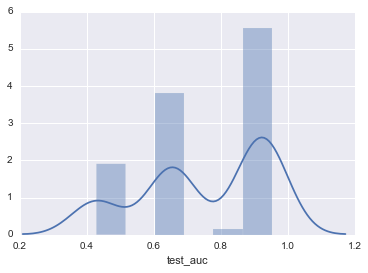

In [83]:
seaborn.distplot(cv_df[cv_df.allele == "HLA-A3101"].test_auc)

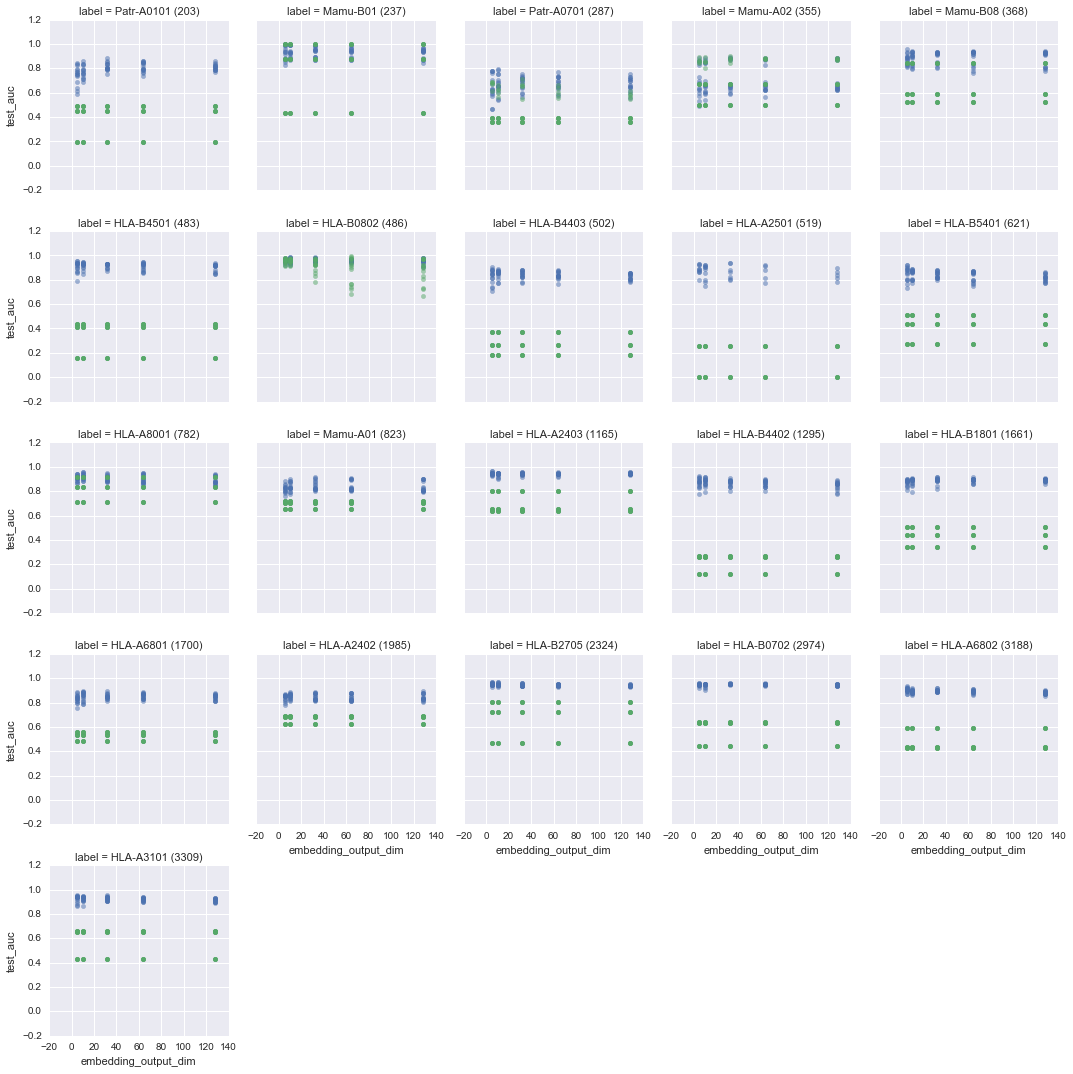

In [77]:
sub_cv_df = cv_df.ix[cv_df.allele != "HLA-A2501"]
sub_cv_df = cv_df
grid = seaborn.FacetGrid(
    sub_cv_df,
    col="label",
    col_wrap=5,
    hue="impute",
    #col_order=[x[1] for x in sorted([(row.allele_size, row.label) for (_, row) in sub_cv_df.iterrows()])]
)
grid.map(pyplot.scatter, "embedding_output_dim", "test_auc", alpha=.5)
#grid.add_legend()

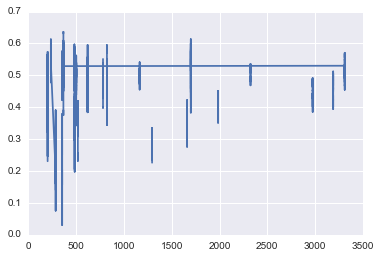

In [25]:
pyplot.plot(cv_df.allele_size, cv_df.test_tau)

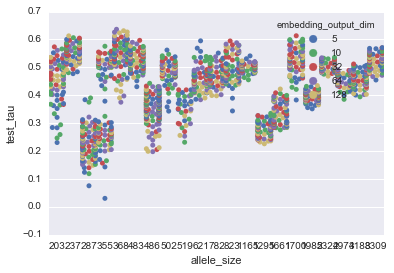

In [22]:
seaborn.swarmplot (data=cv_df, x="allele_size", y="test_tau", hue="embedding_output_dim")

In [15]:
cv_df.allele_size.unique()

array([ 486,  782, 3309,  355,  368,  823, 2974, 1661,  237,  287,  502,
       1295,  203, 2324,  621, 1700, 1985, 1165, 3188,  483,  519])